In [433]:
import pandas as pd
import numpy as np

In [434]:
data = pd.read_csv('matala2_cosmetics_2019-Nov.csv')

C:\Users\laser\AppData\Local\Temp\ipykernel_23092\2858935832.py:1: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('matala2_cosmetics_2019-Nov.csv')


In [435]:
data['event_time'] = pd.to_datetime(data['event_time'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype         
---  ------         --------------    -----         
 0   event_time     1048575 non-null  datetime64[ns]
 1   event_type     1048575 non-null  object        
 2   product_id     1048575 non-null  int64         
 3   category_id    1048575 non-null  int64         
 4   category_code  16715 non-null    object        
 5   brand          602451 non-null   object        
 6   price          1048575 non-null  object        
 7   user_id        1048575 non-null  int64         
 8   user_session   1048357 non-null  object        
dtypes: datetime64[ns](1), int64(3), object(5)
memory usage: 72.0+ MB


## Q1

In [436]:
data['event_time'] = pd.to_datetime(data['event_time'])
data['next_event_time'] = data.groupby(['user_id','user_session'])['event_time'].shift(-1)
data['duration_to_next_event'] = (data['next_event_time'] - data['event_time']).dt.total_seconds()
data['duration_to_next_event'].fillna(0, inplace=True)

In [437]:
data[['user_id','user_session','event_time','duration_to_next_event']][data['user_id'] == 566721094].head(40)

,user_id,user_session,event_time,duration_to_next_event
144607,566721094,ab702d68-bb0b-4186-adc9-e7be8f411816,2019-11-02 09:17:23,0.0
145064,566721094,bfa67c6f-a698-4bb8-8d99-db55b27e1c8b,2019-11-02 09:22:37,2.0
145069,566721094,bfa67c6f-a698-4bb8-8d99-db55b27e1c8b,2019-11-02 09:22:39,3.0
145071,566721094,bfa67c6f-a698-4bb8-8d99-db55b27e1c8b,2019-11-02 09:22:42,2.0
145075,566721094,bfa67c6f-a698-4bb8-8d99-db55b27e1c8b,2019-11-02 09:22:44,0.0
1032764,566721094,db146d70-de97-4a80-b042-4da29f03cd46,2019-11-08 09:42:19,0.0
1036737,566721094,5c6d95df-b5b3-4b4c-8e4e-5b05d42cf92f,2019-11-08 10:05:55,68.0
1036946,566721094,5c6d95df-b5b3-4b4c-8e4e-5b05d42cf92f,2019-11-08 10:07:03,0.0
1037963,566721094,fa9b7b00-3541-4470-869b-822c8eae0244,2019-11-08 10:13:28,23.0
1038013,566721094,fa9b7b00-3541-4470-869b-822c8eae0244,2019-11-08 10:13:51,0.0


## Q2

In [438]:
data.sort_values(by=['user_id','event_time'],inplace = True)
data['days_since_last_visit'] = data.groupby('user_id')['event_time'].diff().dt.days
data['funnel_number'] = np.where(data['days_since_last_visit'].fillna(0)>5,1,0)
data['funnel_number'] = data.groupby('user_id')['funnel_number'].cumsum()+1
data.drop('days_since_last_visit',axis=1, inplace= True)
data[['user_id','user_session','event_time','funnel_number']][data['user_id'] == 566721094].head(40)

,user_id,user_session,event_time,funnel_number
144607,566721094,ab702d68-bb0b-4186-adc9-e7be8f411816,2019-11-02 09:17:23,1
145064,566721094,bfa67c6f-a698-4bb8-8d99-db55b27e1c8b,2019-11-02 09:22:37,1
145069,566721094,bfa67c6f-a698-4bb8-8d99-db55b27e1c8b,2019-11-02 09:22:39,1
145071,566721094,bfa67c6f-a698-4bb8-8d99-db55b27e1c8b,2019-11-02 09:22:42,1
145075,566721094,bfa67c6f-a698-4bb8-8d99-db55b27e1c8b,2019-11-02 09:22:44,1
1032764,566721094,db146d70-de97-4a80-b042-4da29f03cd46,2019-11-08 09:42:19,2
1036737,566721094,5c6d95df-b5b3-4b4c-8e4e-5b05d42cf92f,2019-11-08 10:05:55,2
1036946,566721094,5c6d95df-b5b3-4b4c-8e4e-5b05d42cf92f,2019-11-08 10:07:03,2
1037963,566721094,fa9b7b00-3541-4470-869b-822c8eae0244,2019-11-08 10:13:28,2
1038013,566721094,fa9b7b00-3541-4470-869b-822c8eae0244,2019-11-08 10:13:51,2


## Q3

In [439]:
data['sesion_shift'] = data['user_session'].shift()
data['sesion_same'] = np.where(data['sesion_shift'] == data['user_session'],0,1)
data['index_in_funnel'] = data.groupby(['user_id','funnel_number'])['sesion_same'].cumsum()
data  = data.drop(['sesion_same'], axis=1)
data[['user_id','user_session','event_time','event_type','funnel_number','index_in_funnel']][data['user_id'] == 566721094].head(40)

,user_id,user_session,event_time,event_type,funnel_number,index_in_funnel
144607,566721094,ab702d68-bb0b-4186-adc9-e7be8f411816,2019-11-02 09:17:23,view,1,1
145064,566721094,bfa67c6f-a698-4bb8-8d99-db55b27e1c8b,2019-11-02 09:22:37,view,1,2
145069,566721094,bfa67c6f-a698-4bb8-8d99-db55b27e1c8b,2019-11-02 09:22:39,cart,1,2
145071,566721094,bfa67c6f-a698-4bb8-8d99-db55b27e1c8b,2019-11-02 09:22:42,cart,1,2
145075,566721094,bfa67c6f-a698-4bb8-8d99-db55b27e1c8b,2019-11-02 09:22:44,remove_from_cart,1,2
1032764,566721094,db146d70-de97-4a80-b042-4da29f03cd46,2019-11-08 09:42:19,view,2,1
1036737,566721094,5c6d95df-b5b3-4b4c-8e4e-5b05d42cf92f,2019-11-08 10:05:55,view,2,2
1036946,566721094,5c6d95df-b5b3-4b4c-8e4e-5b05d42cf92f,2019-11-08 10:07:03,view,2,2
1037963,566721094,fa9b7b00-3541-4470-869b-822c8eae0244,2019-11-08 10:13:28,view,2,3
1038013,566721094,fa9b7b00-3541-4470-869b-822c8eae0244,2019-11-08 10:13:51,view,2,3


## Q4

In [440]:
import re

# Define a regular expression pattern
pattern = '[0-9]+\.[0-9]+|[0-9]+'

# Apply the pattern to each element in the 'price' column
data['price'] = data['price'].apply(lambda x: re.findall(pattern, str(x)))
data['price'] = data['price'].apply(lambda x: float(x[0]))
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1048575 entries, 437209 to 1048552
Data columns (total 14 columns):
 #   Column                  Non-Null Count    Dtype         
---  ------                  --------------    -----         
 0   event_time              1048575 non-null  datetime64[ns]
 1   event_type              1048575 non-null  object        
 2   product_id              1048575 non-null  int64         
 3   category_id             1048575 non-null  int64         
 4   category_code           16715 non-null    object        
 5   brand                   602451 non-null   object        
 6   price                   1048575 non-null  float64       
 7   user_id                 1048575 non-null  int64         
 8   user_session            1048357 non-null  object        
 9   next_event_time         837774 non-null   datetime64[ns]
 10  duration_to_next_event  1048575 non-null  float64       
 11  funnel_number           1048575 non-null  int32         
 12  sesion_sh

## Q5

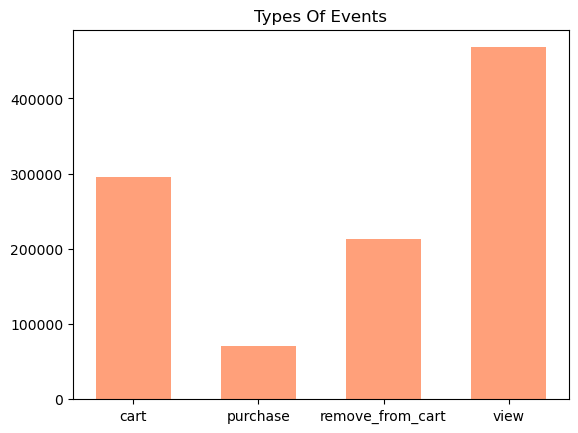

In [441]:
import matplotlib.pyplot as plt

x = data.groupby('event_type')[['funnel_number']].count().reset_index()['event_type']
y = data.groupby('event_type')[['funnel_number']].count().reset_index()['funnel_number']
plt.bar(x,y,color='lightsalmon',width=0.6)
plt.title('Types Of Events')
plt.show()

## Q6

In [442]:
data.sort_values(by=['event_time'],inplace = True)
data['list_of_view'] = data.apply(lambda row: row['product_id'] if row['event_type'] == 'view' else None, axis=1)
data['list_of_added_to_cart'] = data.apply(lambda row: row['product_id'] if row['event_type'] == 'cart' else None, axis=1)
data['list_of_purchased'] = data.apply(lambda row: row['product_id'] if row['event_type'] == 'purchase' else None, axis=1)
data['events_per_visit'] = data.groupby(['user_id', 'user_session'])['event_type'].transform('count')
session_duration = data[['user_session', 'duration_to_next_event']].groupby('user_session').sum()
session_duration = session_duration.rename(columns={'duration_to_next_event': 'session_duration'})
data = data.merge(session_duration, on='user_session', how='left')

In [443]:
new_df = data.groupby(['user_id', 'user_session','funnel_number','index_in_funnel','events_per_visit','session_duration']).agg({
    'list_of_view': lambda x: list(x.dropna()),
    'list_of_added_to_cart': lambda x: list(x.dropna()),
    'list_of_purchased': lambda x: list(x.dropna()),   
}).reset_index()

In [445]:
new_df[['user_id','user_session','funnel_number','index_in_funnel','events_per_visit','session_duration','list_of_view','list_of_added_to_cart',
     'list_of_purchased']][new_df['user_id'] == 566721094].head(40)

,user_id,user_session,funnel_number,index_in_funnel,events_per_visit,session_duration,list_of_view,list_of_added_to_cart,list_of_purchased
156148,566721094,5c6d95df-b5b3-4b4c-8e4e-5b05d42cf92f,2,2,2.0,68.0,"[5847369.0, 5847369.0]",[],[]
156149,566721094,ab702d68-bb0b-4186-adc9-e7be8f411816,1,1,1.0,0.0,[5847369.0],[],[]
156150,566721094,bfa67c6f-a698-4bb8-8d99-db55b27e1c8b,1,2,4.0,7.0,[5847369.0],"[5847369.0, 5847369.0]",[]
156151,566721094,db146d70-de97-4a80-b042-4da29f03cd46,2,1,1.0,0.0,[5847369.0],[],[]
156152,566721094,fa9b7b00-3541-4470-869b-822c8eae0244,2,3,2.0,23.0,"[5847369.0, 5847369.0]",[],[]
